# Stress Strain Calculation of a Laminate

This example presents the stress strain calculation of a Laminate using the CLT. 

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

from composipy import OrthotropicMaterial, LaminateProperty, LaminateStrength

In [10]:
# Material
E1 = 137.9e3
E2 = 11.7e3
v12 = 0.31
G12 = 4.82e3
t = 0.1524

#Loads
Nxx = 100
Mxx = 20

# Quasi laminate
stacking = [45, -45, 90, 0]
stacking += stacking[::-1]

# Object definition
material = OrthotropicMaterial(E1, E2, v12, G12, t)
laminate = LaminateProperty(stacking, material)
strength_analysis = LaminateStrength(laminate, Nxx=Nxx, Mxx=Mxx)

Calculating strains at the midplane $\varepsilon_{0x}$, $\varepsilon_{0y}$ and $\gamma_{0xy}$

In [11]:
strength_analysis.epsilon0()

array([ 1.52630215e-03, -4.89003289e-04, -1.67758599e-20,  5.46178270e-03,
       -2.99304212e-03, -6.90268796e-04])

Calculating strains ply by ply in analysis direction and material direction.

In [15]:
df_strain = strength_analysis.calculate_strain()
df_strain.head(6) #display the first 6

,ply,position,angle,epsilonx,epsilony,gammaxy,epsilon1,epsilon2,gamma12
0,1,top,45,4.86e-03,-2.31e-03,-4.21e-04,1.06e-03,1.48e-03,-7.17e-03
1,1,bot,45,4.02e-03,-1.86e-03,-3.16e-04,9.25e-04,1.24e-03,-5.88e-03
2,2,top,-45,4.02e-03,-1.86e-03,-3.16e-04,1.24e-03,9.25e-04,5.88e-03
3,2,bot,-45,3.19e-03,-1.40e-03,-2.10e-04,1.00e-03,7.90e-04,4.59e-03
4,3,top,90,3.19e-03,-1.40e-03,-2.10e-04,-1.40e-03,3.19e-03,2.10e-04
5,3,bot,90,2.36e-03,-9.45e-04,-1.05e-04,-9.45e-04,2.36e-03,1.05e-04


#### Note
The sequence of the DataFrame starts from the BOTTOM OF THE LAYUP to the TOP  OF THE LAYUP.
When defining the laminate, the first element of the list corresponds to the bottom-most layer. This is especially important for non-symmetric laminates.

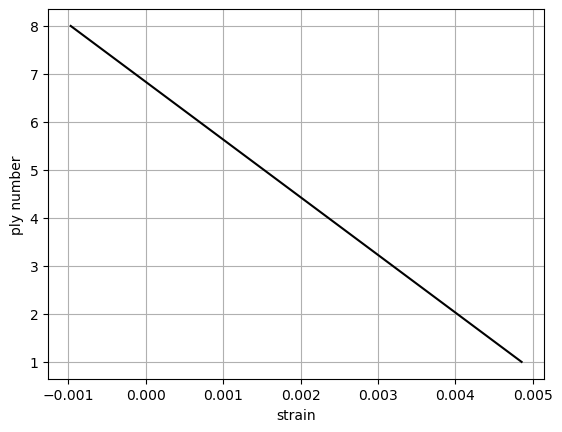

In [27]:
df_strain_top = df_strain[df_strain['position']=='top'] #filter the top position
plt.grid()
plt.xlabel('strain')
plt.ylabel('ply number')
plt.plot(df_strain_top['epsilonx'], df_strain_top['ply'], 'k')

Calculating stresses ply by ply in analysis direction and material direction.

In [16]:
df_stress = strength_analysis.calculate_stress()
df_stress.head(6) #display the first 6

,ply,position,angle,sigmax,sigmay,tauxy,sigma1,sigma2,tau12
0,1,top,45,121.68,52.57,65.77,152.89,21.36,-34.56
1,1,bot,45,103.94,47.25,57.58,133.17,18.02,-28.35
2,2,top,-45,124.02,67.33,-80.22,175.90,15.45,28.35
3,2,bot,-45,99.59,55.32,-64.48,141.93,12.97,22.14
4,3,top,90,32.52,-183.16,-1.01,-183.16,32.52,1.01
5,3,bot,90,24.37,-122.78,-0.51,-122.78,24.37,0.51


#### Note
The sequence of the DataFrame starts from the BOTTOM OF THE LAYUP to the TOP  OF THE LAYUP.
When defining the laminate, the first element of the list corresponds to the bottom-most layer. This is especially important for non-symmetric laminates.

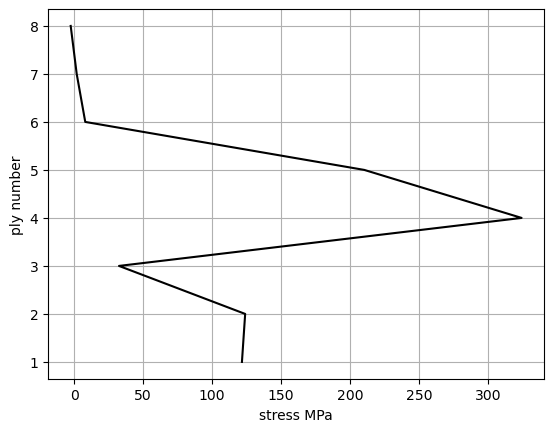

In [30]:
df_stress_top = df_stress[df_stress['position']=='top'] #filter the top position
plt.grid()
plt.xlabel('stress MPa')
plt.ylabel('ply number')
plt.plot(df_stress_top['sigmax'], df_stress_top['ply'], 'k')